#1- Example One (1) ==> Make predictions on fuel consumption data

# 1.First 
1.   Imported Needed Libraries
2.   Read Data 
3.   Detect Columns Names
   



In [2]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#=================================================
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv('auto-mpg.data', names=column_names,na_values = "?", comment='\t',sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


# Second Method
1.   Summation Of Values == NAN
2.   Making Drop For Values == NAN




In [3]:
dataset.isna().sum()
dataset = dataset.dropna()

# Three Step 
1. Make Drop For Origin Column


In [4]:
origin = dataset.pop('Origin')

# Four Step
1. Convert Values To Floating Point Number

In [5]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


# 5-Five Step 
1.  Divide Data Two Training & Test Data
2.  Make Visualization Used Seaborn Library

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


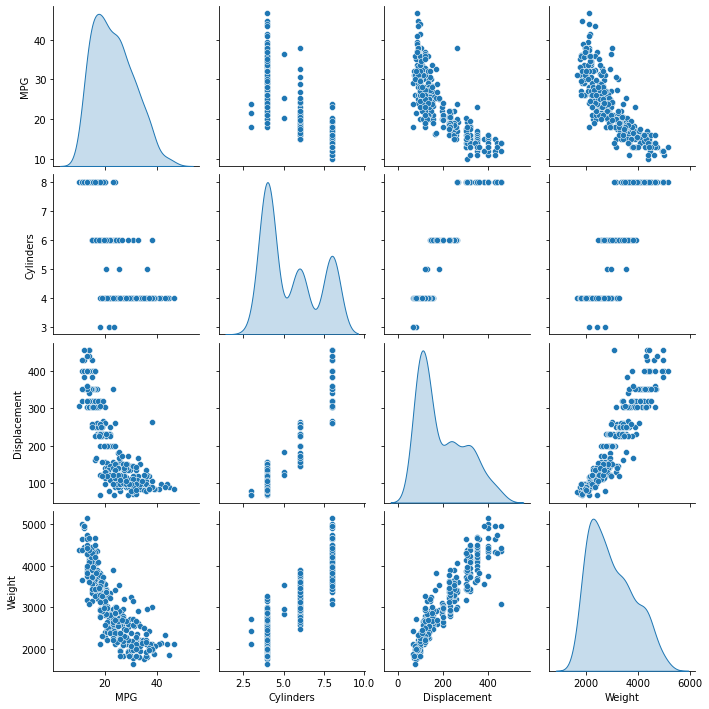

In [6]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

# 6- Six Step 
1. Drop MPG Column From Training Data ==> Using POP
2. Drop MPG Column From Test Data ==> Using POP

In [7]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# 7- Seven Step 
1. Make Normalization For Data 

In [8]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# 8- Eight Step 
1. Craete Function Because To Build Model 
2. Create Neural Networks Contain ( 1 Layer Inputs -- 2 Hidden Layer -- 1 Output Layer)

In [9]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

# -Nine Step 
1. Call Function Because To Build Model
2. Summary About Model

In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


# 10 Step 
1. Create Batches 
2. Show Predictions Values To First 10 Values

In [11]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 410ms/step


array([[ 0.28508255],
       [ 0.17280619],
       [-0.09039705],
       [ 0.1572996 ],
       [ 0.3313217 ],
       [-0.02891106],
       [ 0.4128841 ],
       [ 0.33929378],
       [ 0.10889597],
       [ 0.38968652]], dtype=float32)

# 11 Step ==> Create Function 
1. Function To Used Change (=>) From Epoches To (..)
# Display training progress by printing a single dot for each completed epoch


In [12]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
EPOCHS = 1000
#Object That Enter To Training Model 
history = model.fit(normed_train_data, train_labels,epochs=EPOCHS, validation_split = 0.2, verbose=0,callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

# Step 12

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.240553,0.961691,2.240553,9.642391,2.278099,9.642391,995
996,2.305378,0.963202,2.305378,9.453906,2.335459,9.453906,996
997,2.288718,0.935026,2.288718,9.808047,2.386241,9.808047,997
998,2.237831,0.969265,2.237831,10.077038,2.428179,10.077038,998
999,2.538324,1.012918,2.538324,9.875948,2.374303,9.875948,999


# Step 13 
1. Plotting History With Training Data & Test Data


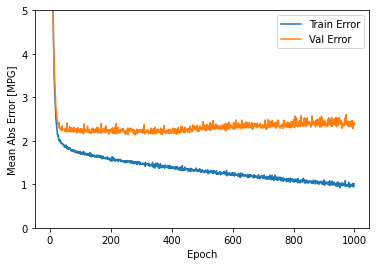

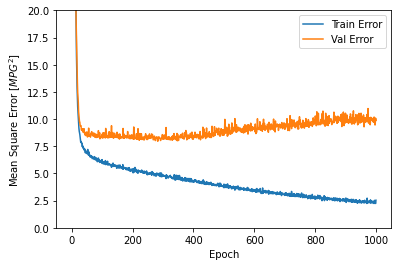

In [16]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
plot_history(history)

# Step 13
1. Call Built Model Function

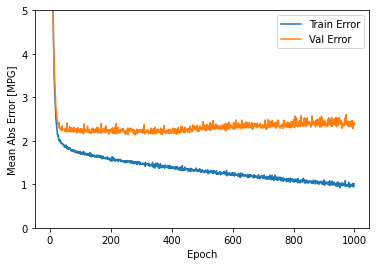

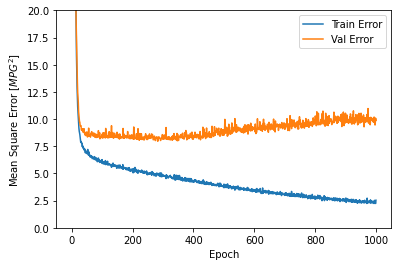

In [18]:
model = build_model()
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
plot_history(history)

# Step 14
1. Know The Value Of Cost Function (Loss Data)

In [19]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error: 23.80 MPG


# Step 15
1. Create Predicitions

In [20]:
test_predictions = model.predict(normed_test_data).flatten()

3/3 [==============================] - 0s 3ms/step


# Step 16 
1. Plotting Between True Values & Predictions Values

(0.0, 38.50711833119392)

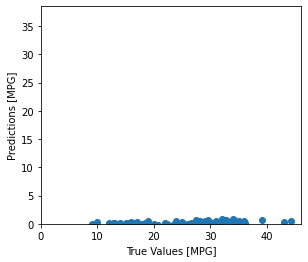

In [21]:
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])

# Step 17 
1. Show Plotting Between Test Values & Test Predictions

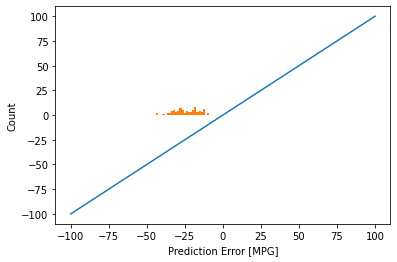

In [22]:
_ = plt.plot([-100, 100], [-100, 100])
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")